In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import os

import torch
import torchvision
from torch import nn
from torch.autograd import Variable
import torch.nn.functional as F


In [2]:
# Loading Data

trainroot = "./train"
testroot = "./test"

# Image size = 80*80*3
train_data = torchvision.datasets.ImageFolder(
    root=trainroot,
    transform=torchvision.transforms.ToTensor()
)
train_loader = torch.utils.data.DataLoader(
    train_data,
    batch_size=64,
    num_workers=1,
    shuffle=False
)

test_dataset = torchvision.datasets.ImageFolder(
    root=testroot,
    transform=torchvision.transforms.ToTensor()
)
test_loader = torch.utils.data.DataLoader(
    test_dataset,
    batch_size=4,
    shuffle=False,
    num_workers=2)

classes = ('ship', 'non-ship')

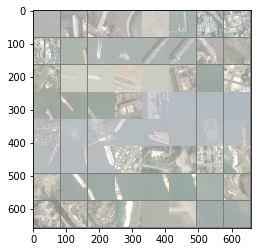

In [5]:
# Try to show some training images
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()
    
# get some random training images
dataiter = iter(train_loader)
images = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))

In [1]:
# Build the CNN network
import torch.nn as nn
import torch.nn.functional as F

# Network structure:

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # torch.nn.Conv2d(in_channels, out_channels, kernel_size, stride=1, 
        # padding=0, dilation=1, groups=1, bias=True, padding_mode='zeros')
        self.conv1 = nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        
        self.conv2 = nn.Conv2d(64, 128, 3)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        
        self.conv3 = nn.Conv2d(128, 256, 3)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        
        self.conv4 = nn.Conv2d(256, 512, 3)
        self.pool = nn.AvgPool2d(kernel_size=2, stride=2, padding=0)
        
        # Fully connected layers
        self.fc1 = nn.Linear(512 * 3 * 3, 120)
        self.fc2 = nn.Linear(120, 60)
        self.fc3 = nn.Linear(60, 2)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = self.pool(F.relu(self.conv4(x)))
        x = x.view(-1, 512 * 3 * 3)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [ ]:
# Define a Loss function and optimizer
import torch.optim as optim

# Cross-entropy is good for binary classifier
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [ ]:
# Train the network
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        # get the inputs; data is a list of [inputs, labels]!!!Here is not!!! Must be changed
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

# Save the trained model
PATH = './ships_net.pth'
torch.save(net.state_dict(), PATH)

In [ ]:
# Test the network on the test data
dataiter = iter(test_loader)
images = dataiter.next()